## ch05. 차원 축소

### 주성분 분석 (PCA)

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [59]:
import pandas as pd 

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['type'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target 변수: 유방암의 악성 (0), 양성(1) 여부 

0~29 번째 열: 세포핵 디지털 이미지로 부터 추출된 특성값들 

In [60]:
df.shape

(569, 31)

In [73]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,range(0,30)].values

y = df.iloc[:,30].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [74]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler() 
le = LabelEncoder() 

X_train, X_test = sc.fit_transform(X_train), sc.fit_transform(X_test)
y_train, y_test = le.fit_transform(y_train), le.fit_transform(y_test)

데이터 전처리: 타깃변수는 팩터 변수로 변형해주고, 예측변수는 표준화 작업을 통해 평균을 0으로 맞춤 

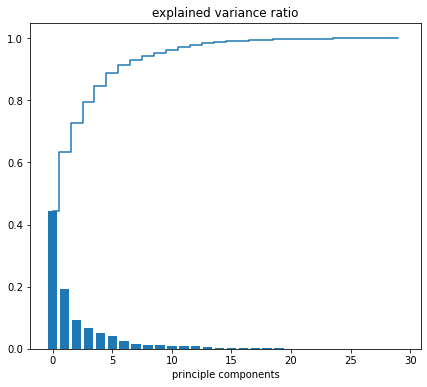

In [93]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

pca = PCA()

pca.fit_transform(X_train)

plt.figure(figsize=(7,6))
plt.bar(range(0,30),pca.explained_variance_ratio_) 
plt.step(range(0,30),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.title('explained variance ratio')
plt.xlabel('principle components')
plt.show()

설명 분산의 누적 그래프로 보아 4개 정도의 주성분으로 차원 축소를 하여도 전체분산의 80% 가량 설명이 가능함

In [95]:
pca = PCA(n_components=4)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.fit_transform(X_test)

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

params_range = [0.0001,0.01,0.01,1.0,10.0,100.0,1000.0]

In [99]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [103]:
param_grid = [{'C':params_range,
               'kernel':['linear']},
              {'C':params_range,
               'kernel':['rbf'],
               'gamma':params_range},]
gs = GridSearchCV(estimator=svc, cv=10, param_grid=param_grid, scoring='accuracy')

gs.fit(X_train,y_train)

y_pred = gs.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)

train_accuracy = gs.best_score_

print('훈련 정확도:%.3f\n테스트 정확도:%.3f'%(test_accuracy,train_accuracy))

훈련 정확도:0.974
테스트 정확도:0.976


## 선형 판별 분석을 통한 차원 축소 (LDA)

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.pipeline import make_pipeline

lda = LDA(n_components=1)
lda.fit(X_train, y_train)
score = lda.score(X_test,y_test)

print('모델 정확도: %.3f'%score)

모델 정확도: 0.947


## 커널 PCA를 이용한 차원축소 

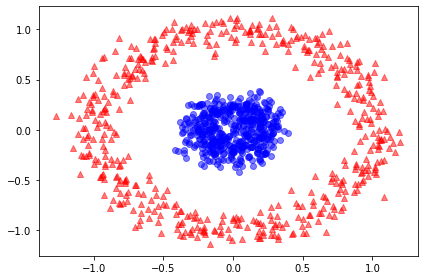

In [137]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

비선형으로 분리 불가한 연습용 데이터 생성. 

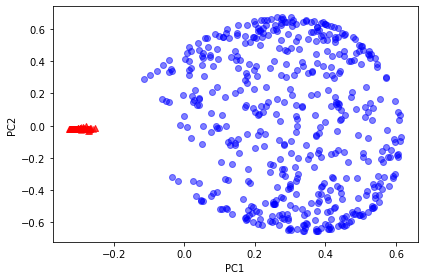

In [141]:
from sklearn.decomposition import KernelPCA 

kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)

X_kpca = kpca.fit_transform(X)


plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

2차원 데이터인 원본 데이터를 n_components = 3 인자값을 주어 3차원 상으로 매핑후 선형적으로 분리함. 

커널함수는 방사기저 함수를 이용함